He aquí el desarrollo propio con los datos que obtuvimos.

Tasa de eventos (lambda): 10.357000000000001


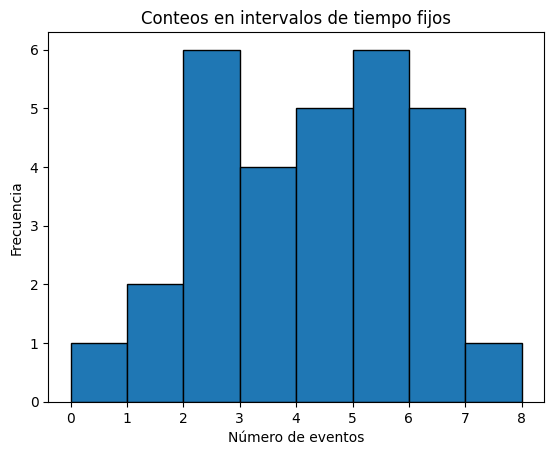

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


valores_tiempo = np.array([7.13,18.84,4.52,12.49,8.43,9.5,9.83,6.57,12.73,13.53]) #en seg

conteos_por_intervalo = np.array([2, 4, 1, 6, 6, 3, 4, 5, 2, 6, 5, 5, 3, 1, 3, 3, 8, 5, 5, 2, 2, 6, 6, 0, 5, 2, 4, 4, 2, 4]) 

#americio-241
conteos_americio = np.array([1, 3, 5, 5, 7, 4, 8, 5, 3, 8, 8, 5, 4, 0, 1, 6, 8, 4, 8, 4, 3, 6, 4, 2, 5, 7, 2, 4, 1, 5])

#torio - barra soldadura
conteos_torio = np.array([11, 6, 6, 4, 2, 4, 8, 2, 3, 7, 5, 5, 5, 9, 6, 7, 2, 5, 7, 10, 0, 10, 5, 3, 8, 4, 4, 3, 7, 6])

lambda_rate = valores_tiempo.mean()  # eventos por segundo

print("Tasa de eventos (lambda):", lambda_rate)

plt.hist(conteos_por_intervalo, bins=range(min(conteos_por_intervalo), max(conteos_por_intervalo)+1), edgecolor='black')
plt.title("Conteos en intervalos de tiempo fijos")
plt.xlabel("Número de eventos")
plt.ylabel("Frecuencia")
plt.show()

Con curve_fit:

[1. 2. 6. 4. 5. 6. 5. 0. 1.]
Parámetros ajustados:
λ ajustada = 4.099
amplitud ajustada = 30.172


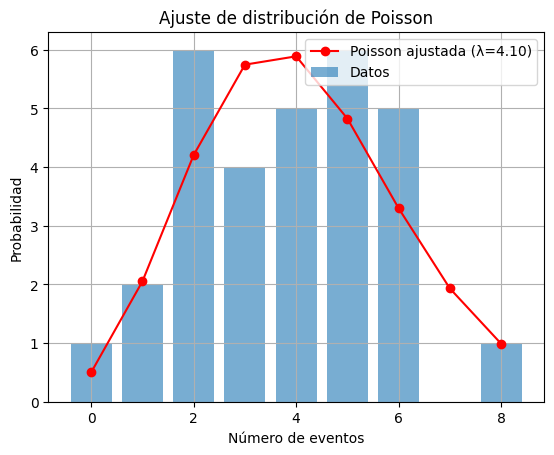

Media del ajuste: 4.10
Varianza del ajuste: 4.10
Desviación estándar del ajuste: 2.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import poisson



# Histograma: frecuencias absolutas
valores, frecuencias = np.unique(conteos_por_intervalo, return_counts=True)

valores_ = np.arange(min(valores), max(valores)+1)
frecuencias_ = np.zeros(len(valores_))

indices = np.searchsorted(valores_, valores)
frecuencias_[indices] = frecuencias




# Definimos la función de Poisson a ajustar
def poisson_pmf(k, lamb, amp):
    return amp*poisson.pmf(k, lamb)

# Ajuste con curve_fit
# A veces hay que poner el valor inicial de lambda, por ejemplo: p0=[1.0] o un valor aproximado del lambda (parámetro), para que no de error
params_opt, params_cov = curve_fit(poisson_pmf, valores_, frecuencias_) 

# Resultado del ajuste
lambda_ajustada = params_opt[0]
amp_ajustada = params_opt[1]
print('Parámetros ajustados:')
print(f"λ ajustada = {lambda_ajustada:.3f}")
print(f"amplitud ajustada = {amp_ajustada:.3f}")



# Graficamos
x = np.arange(min(valores_), max(valores_)+1)
plt.bar(valores_, frecuencias_, alpha=0.6, label='Datos')
plt.plot(x, poisson_pmf(x, lambda_ajustada, amp_ajustada), 'o-', color='red', label=f'Poisson ajustada (λ={lambda_ajustada:.2f})')

plt.xlabel("Número de eventos")
plt.ylabel("Probabilidad")
plt.title("Ajuste de distribución de Poisson")
plt.legend()
plt.grid()
plt.show()

print(f'Media del ajuste: {lambda_ajustada:.2f}')
print(f'Varianza del ajuste: {lambda_ajustada:.2f}')
print(f'Desviación estándar del ajuste: {np.sqrt(lambda_ajustada):.1f}')

Prueba de bondad con el método del profe.

5.025417515301358


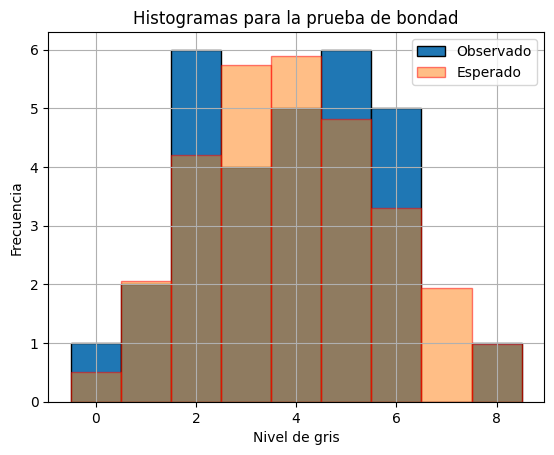

Valor crítico de chi2 para 6 grados de libertad y alpha=0.05: 12.59
No se rechaza la hipótesis nula: los datos siguen una distribución de Poisson.


In [ ]:
from scipy.stats import chi2
def chi_sqr(dathistexp,dathistaj):
    return sum(((dathistexp-dathistaj)**2)/(dathistaj))


chi=chi_sqr(frecuencias_, poisson_pmf(valores_, lambda_ajustada, amp_ajustada))
print(chi)

df = len(frecuencias_)-3
alpha = 0.05
plt.bar(valores_, frecuencias_, width=np.ones(len(valores_)), edgecolor='black',label='Observado')
plt.bar(valores_, poisson_pmf(valores_, lambda_ajustada, amp_ajustada), width=np.ones(len(valores_)), edgecolor='red',alpha=0.5,label='Esperado')
plt.xlabel("Nivel de gris")
plt.ylabel("Frecuencia")
plt.title("Histogramas para la prueba de bondad")
plt.grid(True)
plt.legend()
plt.show()



chi2_critico = chi2.ppf(1-alpha, df)
print(f"Valor crítico de chi2 para {df} grados de libertad y alpha={alpha}: {chi2_critico:.2f}")
if chi < chi2_critico:
    print("No se rechaza la hipótesis nula: los datos siguen una distribución de Poisson.")
else:
    print("Se rechaza la hipótesis nula: los datos no siguen una distribución de Poisson.")

Repetir esto con los datos arrojados con las muestras no es difícil, solo cambiar los valores de conteos y sale.

20.464928783278584


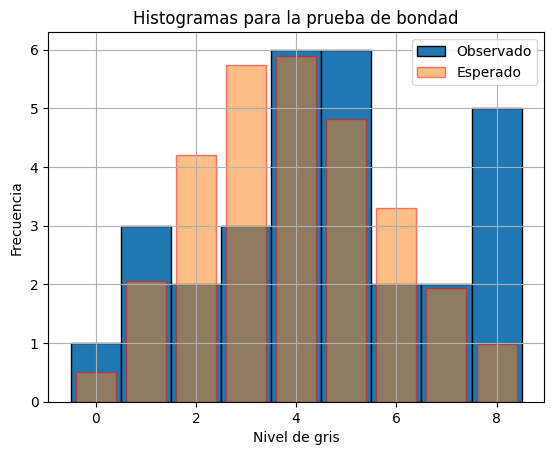

Valor crítico de chi2 para 8 grados de libertad y alpha=0.05: 15.51
Se rechaza la hipótesis nula: los datos no siguen una distribución de la radición de fondo.


In [12]:
from scipy.stats import chi2




def chi_sqr(dathistexp,dathistaj):
    return sum(((dathistexp-dathistaj)**2)/(dathistaj))

valores_americio, frecuencias_americio = np.unique(conteos_americio, return_counts=True)



valores_americio_ = np.arange(min(valores_americio), max(valores_americio)+1)
frecuencias_americio_ = np.zeros(len(valores_americio_))



indices = np.searchsorted(valores_americio_, valores_americio)
frecuencias_americio_[indices] = frecuencias_americio



chi=chi_sqr(frecuencias_americio_, poisson_pmf(valores_americio_, lambda_ajustada, amp_ajustada))
print(chi)



df = len(frecuencias_americio_)-1
alpha = 0.05
plt.bar(valores_americio_, frecuencias_americio_, width=np.ones(len(valores_americio_)), edgecolor='black',label='Observado')
plt.bar(valores_americio_, poisson_pmf(valores_americio_, lambda_ajustada, amp_ajustada), edgecolor='red',alpha=0.5,label='Esperado')
plt.xlabel("Nivel de gris")
plt.ylabel("Frecuencia")
plt.title("Histogramas para la prueba de bondad")
plt.grid(True)
plt.legend()
plt.show()



chi2_critico = chi2.ppf(1-alpha, df)
print(f"Valor crítico de chi2 para {df} grados de libertad y alpha={alpha}: {chi2_critico:.2f}")
if chi < chi2_critico:
    print("No se rechaza la hipótesis nula: los datos siguen la distribución de la radiación de fondo.")
else:
    print("Se rechaza la hipótesis nula: los datos no siguen una distribución de la radición de fondo.")

39.330812483852924


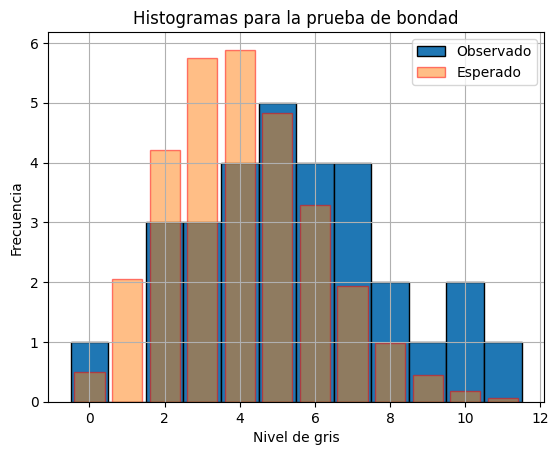

Valor crítico de chi2 para 11 grados de libertad y alpha=0.05: 19.68
Se rechaza la hipótesis nula: los datos no siguen una distribución de la radición de fondo.


In [13]:
from scipy.stats import chi2




def chi_sqr(dathistexp,dathistaj):
    return sum(((dathistexp-dathistaj)**2)/(dathistaj))

valores_torio, frecuencias_torio = np.unique(conteos_torio, return_counts=True)


valores_torio_ = np.arange(min(valores_torio), max(valores_torio)+1)
frecuencias_torio_ = np.zeros(len(valores_torio_))

indices = np.searchsorted(valores_torio_, valores_torio)
frecuencias_torio_[indices] = frecuencias_torio


chi=chi_sqr(frecuencias_torio_, poisson_pmf(valores_torio_, lambda_ajustada, amp_ajustada))
print(chi)



df = len(frecuencias_torio_)-1
alpha = 0.05
plt.bar(valores_torio_, frecuencias_torio_, width=np.ones(len(valores_torio_)), edgecolor='black',label='Observado')
plt.bar(valores_torio_, poisson_pmf(valores_torio_, lambda_ajustada, amp_ajustada), edgecolor='red',alpha=0.5,label='Esperado')
plt.xlabel("Nivel de gris")
plt.ylabel("Frecuencia")
plt.title("Histogramas para la prueba de bondad")
plt.grid(True)
plt.legend()
plt.show()



chi2_critico = chi2.ppf(1-alpha, df)
print(f"Valor crítico de chi2 para {df} grados de libertad y alpha={alpha}: {chi2_critico:.2f}")
if chi < chi2_critico:
    print("No se rechaza la hipótesis nula: los datos siguen la distribución de la radiación de fondo.")
else:
    print("Se rechaza la hipótesis nula: los datos no siguen una distribución de la radición de fondo.")